# **Predict Bike Rentals with Time-Series Models**
 **Goal:** Predict daily bike rental counts using time-series modeling (ARIMA), based on
 historical rental data.

**Install Required Libraries**

In [1]:
!pip install ucimlrepo
!pip install numpy==1.23.5  # Compatible numpy version for pmdarima
!pip install pmdarima --no-cache-dir
from pmdarima import auto_arima
import pandas as pd
from pandas import date_range
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.4 MB/s eta 0:00:00


**Load the Bike Sharing Dataset**

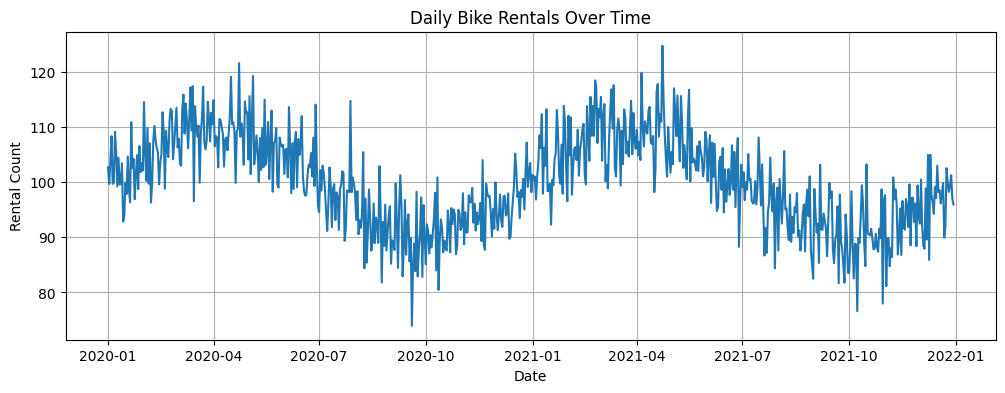

In [2]:
# Simulate a time-series of bike rentals
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=730, freq='D')  # 2 years

# Add seasonal pattern + noise
rentals = 100 + 10 * np.sin(2 * np.pi * dates.dayofyear / 365) + np.random.normal(0, 5, size=len(dates))

# Create DataFrame
df = pd.DataFrame({'date': dates, 'rentals': rentals})

# Set date as index
df.set_index('date', inplace=True)

# Visualize data
plt.figure(figsize=(12, 4))
plt.plot(df['rentals'])
plt.title("Daily Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Rental Count")
plt.grid(True)
plt.show()


**Check Stationarity (Optional)**

In [3]:
# Augmented Dickey-Fuller Test
result = adfuller(df['rentals'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.3774161884040472
p-value: 0.5930539248685913


**Train/Test Split**

In [4]:
# Use last 37 days for short-term training and testing
recent_data = df['rentals'][-37:]
train = recent_data[:30]  # First 30 days
test = recent_data[30:]   # Last 7 days

**Fit ARIMA Model (Auto-ARIMA)**

In [5]:
# Fit ARIMA model
model = auto_arima(
    train,
    seasonal=True,
    m=7,                  # Weekly seasonality
    start_p=1, start_q=1,
    max_p=2, max_q=2,
    max_P=1, max_Q=1,
    d=None,
    D=1,
    stepwise=True,
    suppress_warnings=True,
    trace=True,
    error_action='ignore'
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=159.043, Time=0.97 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=165.412, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=156.446, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=163.448, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=163.424, Time=0.04 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=157.674, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=158.614, Time=0.05 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=157.876, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=157.965, Time=0.11 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=157.485, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,1,0)[7] intercept   : AIC=159.875, Time=0.17 sec
 ARIMA(1,0,0)(1,1,0)[7]             : AIC=157.225, Time=0.05 sec

Best model:  ARIMA(1,0,0)(1,1,0)[7] intercept
Total fit time: 3.203 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Forecast Future Rentals**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


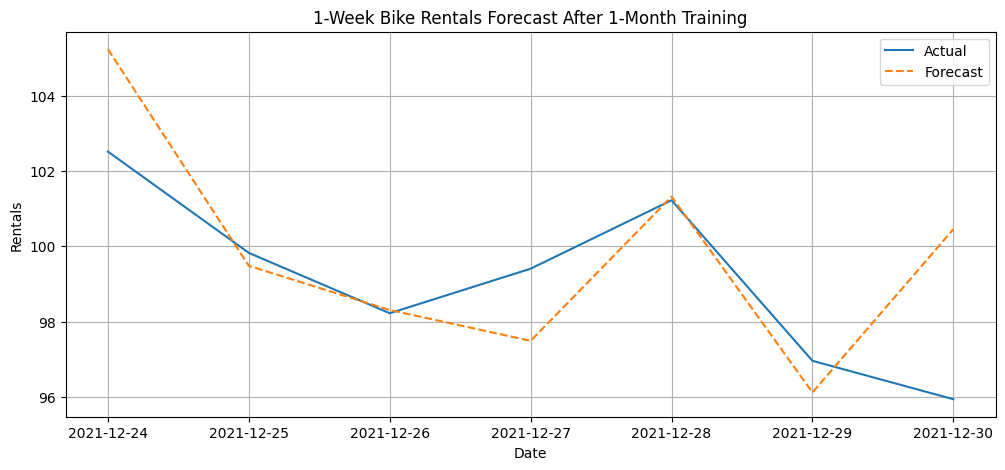

In [ ]:
# Forecast next 7 days
forecast = model.predict(n_periods=7)

# Create forecast index to match test set
forecast_index = test.index

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, test.values, label="Actual")
plt.plot(forecast_index, forecast, label="Forecast", linestyle='--')
plt.title("1-Week Bike Rentals Forecast Training")
plt.xlabel("Date")
plt.ylabel("Rentals")
plt.legend()
plt.grid(True)
plt.show()

**Evaluate Forecast Accuracy**

In [7]:

mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 4.62
Mean Absolute Error: 1.50


## **Summary:**

This notebook simulates two years of daily bike rental data with seasonal patterns and random noise. Using this time series, a Seasonal ARIMA (SARIMA) model is built to forecast the next 7 days based on the most recent 30 days of data.


*   **Data Simulation:** Generated using a sine function to mimic seasonality and added noise for realism.

*   **Data Split:** Last 30 days used for training, final 7 days for testing.

*   **Modeling:** Used auto_arima with monthly seasonality (m=30), Stepwise search to optimize performance.
*   **Forecasting:** Predicted the next 7 days and plotted results against actual values.

**Evaluation:**

Mean Squared Error (MSE): 4.62

Mean Absolute Error (MAE): 1.50